## Goal: Find values of n such that when e=3 there exists a permutation of [n] such that for all pairs of adjacent integers, there exists some k such that they sum to k^e
- When one exists, find such a permutation of [n] explicitly
- More generally: for all n, identify how many such permutations of [n] exist
- More generally: for all n and e, identify how many such permutations of [n] exist

In [1]:
import networkx as nx
# import numpy as np
# import matplotlib

In [62]:
# A class to represent a graph object
class Graph:
 
    # Constructor
    def __init__(self, edges, n):
 
        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]
 
        # add edges to the undirected graph
        for (src, dest) in edges:
            self.adjList[src-1].append(dest)
            self.adjList[dest-1].append(src)
    
    def neighborhood(self, v):
        return self.adjList[v-1]
    
    def degree(self, v):
        return len(self.neighborhood(v))
    
    def neighborhood_degree_list(self, v):
        return [self.degree(i) for i in self.neighborhood(v)]
    
    def closed_neighborhood_all_2(self, v):
        if self.degree(v) != 2:
            return False
        
        for neighbor in self.neighborhood(v):
            if self.degree(neighbor) != 2:
                return False
        return True


hamiltonian_paths = []

def hamiltonianPaths(graph, v, visited, path, n):
    global hamiltonian_paths
    
    # if all the vertices are visited, then the Hamiltonian path exists
    if len(path) == n:
        # print the Hamiltonian path
        print(path)
        hamiltonian_paths.append(path.copy())
        return
 
    # Check if every edge starting from vertex `v` leads to a solution or not
    for w in graph.adjList[v-1]:
 
        # process only unvisited vertices as the Hamiltonian
        # path visit each vertex exactly once
        if not visited[w-1]:
            visited[w-1] = True
            path.append(w)
 
            # check if adding vertex `w` to the path leads to the solution or not
            hamiltonianPaths(graph, w, visited, path, n)
 
            # backtrack
            visited[w-1] = False
            path.pop()
 
 
def findHamiltonianPaths(graph, n):
    min_deg_1 = False
    for i in range(1, n+1):
        if graph.degree(i) <= 1:
            min_deg_1 = True

    # start with every node
    for start in range(1, n+1):
        if (not min_deg_1) or (graph.degree(start) == 1):
            if not graph.closed_neighborhood_all_2(start):
                # add starting node to the path
                path = [start]

                # mark the start node as visited
                visited = [False] * n
                visited[start-1] = True

                hamiltonianPaths(graph, start, visited, path, n)
 
 
def makeEdges(n, e=2):
    edges = []
    
    perfect_powers = []
    i = 2
    while i**e < 2*n:
        perfect_powers.append(i**e)
        i += 1
    
    for i in range(1, n+1):
        for power in perfect_powers:
            j = power - i
            if 0 < j < i and j != i:
                edges.append((j, i))
    
    return edges

In [63]:
if __name__ == '__main__':
    global hamiltonian_paths
    for n in range(5, 295):
        hamiltonian_paths = []

        # total number of nodes in the graph (labelled from 0 to 3)
#         n = 15
        e = 3

        # consider a complete graph having 4 vertices
        edges = makeEdges(n, e=e) # [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
#         print(edges)
        
        G = nx.Graph()
        G.add_edges_from(edges)
        if nx.is_connected(G) and len([1 for deg in dict(nx.degree(G)).values() if deg <= 1]) <= 2:
            # build a graph from the given edges
            graph = Graph(edges, n)

            findHamiltonianPaths(graph, n)
            if len(hamiltonian_paths) > 0:
                print(f"\nn = {n}, e = {e}, found {len(hamiltonian_paths)} hamiltonian paths\n\n")
        
        if n % 25 == 0:
            print(f"done up to n={n}")
        
    print(f"done up to n={n}")

done up to n=25
done up to n=50
done up to n=75
done up to n=100
done up to n=125
done up to n=150
done up to n=175
done up to n=200
done up to n=225
done up to n=250
done up to n=275
done up to n=294


In [59]:
dict(nx.degree(G))
# len([1 for deg in dict(nx.degree(G)).values() if deg <= 1])

{3: 5,
 5: 5,
 2: 5,
 6: 5,
 1: 5,
 7: 5,
 13: 4,
 14: 4,
 12: 4,
 15: 4,
 11: 4,
 16: 4,
 10: 4,
 17: 4,
 9: 4,
 18: 4,
 8: 4,
 19: 4,
 20: 4,
 21: 4,
 22: 4,
 4: 4,
 23: 4,
 24: 4,
 25: 4,
 26: 4,
 31: 3,
 33: 3,
 30: 3,
 34: 3,
 29: 3,
 35: 3,
 28: 3,
 36: 3,
 27: 3,
 37: 3,
 38: 3,
 39: 3,
 40: 3,
 41: 3,
 42: 3,
 43: 3,
 44: 3,
 45: 3,
 46: 3,
 47: 4,
 48: 4,
 49: 4,
 50: 4,
 51: 4,
 52: 4,
 53: 4,
 54: 4,
 55: 4,
 56: 4,
 57: 4,
 58: 4,
 59: 4,
 60: 4,
 61: 4,
 62: 4,
 63: 4,
 64: 3,
 65: 3,
 66: 3,
 67: 3,
 68: 3,
 69: 3,
 70: 3,
 71: 3,
 72: 3,
 73: 3,
 74: 3,
 75: 3,
 76: 3,
 77: 3,
 78: 3,
 79: 3,
 80: 3,
 81: 3,
 82: 3,
 83: 3,
 84: 3,
 85: 3,
 86: 3,
 87: 3,
 88: 3,
 89: 3,
 90: 3,
 91: 3,
 92: 3,
 32: 2,
 93: 3,
 94: 3,
 95: 3,
 96: 3,
 97: 3,
 98: 3,
 99: 3,
 100: 3,
 101: 3,
 102: 3,
 103: 3,
 104: 3,
 105: 3,
 106: 3,
 107: 3,
 108: 2,
 109: 3,
 110: 3,
 111: 3,
 112: 3,
 113: 3,
 114: 3,
 115: 3,
 116: 3,
 117: 3,
 118: 3,
 119: 3,
 120: 3,
 121: 3,
 122: 3,
 123: 3,
 

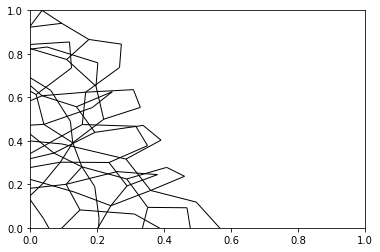

In [41]:
# edges = makeEdges(180, e=e)

# G = nx.Graph()
# G.add_edges_from(edges)
nx.draw_networkx_edges(G, pos=nx.kamada_kawai_layout(G))

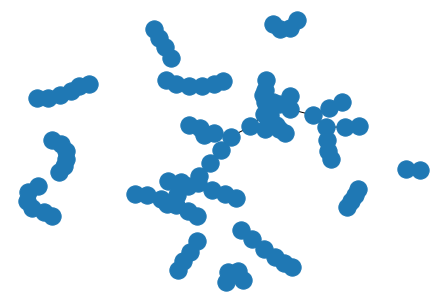

In [9]:
# nx.draw_networkx_edges(G, pos=nx.spring_layout(G))
# nx.draw_networkx(G)
# nx.draw(G)